# Time Series Forecasting with LSTM

In this notebook, we explore the application of **Long Short-Term Memory (LSTM)** networks for forecasting time series data. Specifically, we will use historical **airline passenger counts** to predict future passenger traffic. LSTM is a powerful variant of Recurrent Neural Networks (RNNs) that is capable of learning and remembering long-term dependencies in sequential data, making it highly effective for time series forecasting tasks.

### Problem Overview
The **Airline Passengers dataset** provides monthly counts of international airline passengers from 1949 to 1960. Predicting future passenger counts based on historical trends is crucial for airline operations, resource planning, and demand forecasting. In this notebook, we will build an LSTM model to forecast future passenger traffic and evaluate its performance using several metrics.

### Objectives
1. **Preprocessing**: Load and preprocess the dataset, including handling any missing values, scaling features, and preparing the data for input into the LSTM model.
2. **Train-Test Split**: Split the data into training and testing sets for model evaluation.
3. **Model Building**: Construct and train an LSTM model, and fine-tune hyperparameters.
4. **Evaluation**: Assess the model's performance using metrics such as **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, and **R-squared (R²)**.
5. **Conclusion**: Discuss the model’s predictive power and potential improvements for better accuracy and generalization.


## Downloading Dataset

In [ ]:
!wget https://raw.githubusercontent.com/amankharwal/Website-data/master/airline-passengers.csv

--2025-01-02 20:37:17--  https://raw.githubusercontent.com/amankharwal/Website-data/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.1’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2025-01-02 20:37:17 (30.9 MB/s) - ‘airline-passengers.csv.1’ saved [2180/2180]



## Import necessary libraries

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility
numpy.random.seed(7)

## Load Dataset

In [ ]:
# load the dataset
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

### Splitting Data

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


## Time Series with LSTM


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 16ms/step - loss: 0.0526
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0260
Epoch 3/100
94/94 - 0s - 4ms/step - loss: 0.0186
Epoch 4/100
94/94 - 0s - 3ms/step - loss: 0.0167
Epoch 5/100
94/94 - 0s - 3ms/step - loss: 0.0154
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0143
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0132
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0121
Epoch 9/100
94/94 - 0s - 3ms/step - loss: 0.0110
Epoch 10/100
94/94 - 0s - 3ms/step - loss: 0.0098
Epoch 11/100
94/94 - 0s - 3ms/step - loss: 0.0086
Epoch 12/100
94/94 - 0s - 4ms/step - loss: 0.0073
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0060
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0049
Epoch 15/100
94/94 - 0s - 3ms/step - loss: 0.0038
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0031
Epoch 17/100
94/94 - 0s - 3ms/step - loss: 0.0026
Epoch 18/100
94/94 - 0s - 3ms/step - loss: 0.0023
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 20/100
94/94 - 0s - 3ms/step - loss: 0.0021
Epoch 21/100
94/94 -

## Make Prediction

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


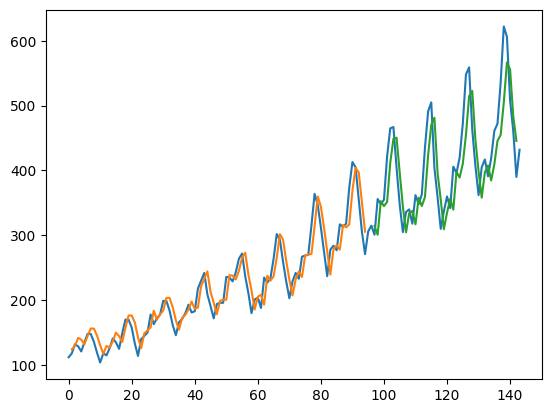

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()